In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [3]:
collisions = pd.read_csv('./uk_gov/cycling_safety_uk_gov.csv')
aadf = pd.read_csv('./uk_gov/dft_traffic_counts_aadf.csv',low_memory=False)


In [4]:
aadf.columns

Index(['Count_point_id', 'Year', 'Region_id', 'Region_name', 'Region_ons_code',
       'Local_authority_id', 'Local_authority_name', 'Local_authority_code',
       'Road_name', 'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Estimation_method',
       'Estimation_method_detailed', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles'],
      dtype='object')

In [70]:
aadf['Link_length_miles'].median()

0.93

In [65]:
aadf['Road_name1'] = [string[0] for string in aadf.Road_name.values]
aadf['Road_name2'] = [string[1:] for string in aadf.Road_name.values]

ValueError: could not convert string to float: ''

In [57]:
aadf.Road_name1.value_counts()

A    372180
U     63546
C     29052
B     24501
M     22106
Name: Road_name1, dtype: int64

In [66]:
aadf.Road_name2.values

array(['3111', '3112', '3111', ..., '', '', ''], dtype=object)

In [39]:
collisions.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Type', 'Bicycles', 'fatal',
       'serious', 'slight', 'geometry', 'index_right', 'geometry_new'],
      dtype='object')

In [54]:
collisions['Junction_Detail'].value_counts()

 3    101510
 0     65271
 1     28579
 6     26267
 8     12375
 9      7491
 2      4913
 7      2979
 5      1273
-1       305
Name: Junction_Detail, dtype: int64

In [6]:
from sklearn.neighbors import NearestNeighbors

In [87]:
neigh = NearestNeighbors(n_neighbors=1,radius=0.1)

In [98]:
neigh.fit(aadf[['Longitude','Latitude']])

NearestNeighbors(n_neighbors=3, radius=0.1)

In [101]:
A,B = neigh.kneighbors(collisions[['Longitude','Latitude']],1)

In [10]:
print('The maximum distance between tracker and collision is:',np.max(A*61.8),'miles')
print('The maximum distance between tracker and collision is:',np.min(A*61.8),'miles')
print('The maximum distance between tracker and collision is:',np.median(A*61.8),'miles')

The maximum distance between tracker and collision is: 38.511379340988945 miles
The maximum distance between tracker and collision is: 4.944000000828286e-06 miles
The maximum distance between tracker and collision is: 0.20148741764557787 miles


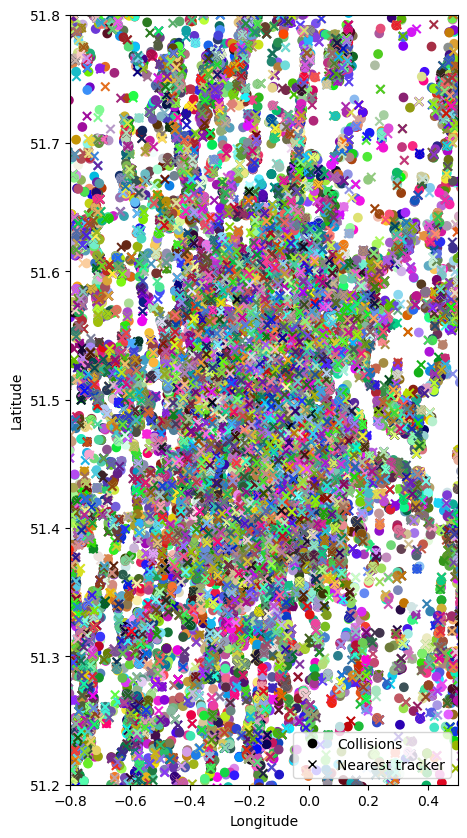

In [102]:
plotN = 200000

colors = np.random.rand(plotN,3)

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(collisions.head(plotN).Longitude.values,collisions.head(plotN).Latitude.values,c=colors)
ax.scatter(aadf.iloc[B[:plotN].flatten().tolist()].Longitude.values,aadf.iloc[B[:plotN].flatten().tolist()].Latitude.values,c=colors,marker='x')

#Get artists and labels for legend and chose which ones to display
handles, labels = ax.get_legend_handles_labels()
display = (0,1,2)

#Create custom artists
simArtist = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
anyArtist = plt.Line2D((0,1),(0,0), color='k',marker='x',linestyle='')

#Create legend from custom artist/label lists
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[simArtist,anyArtist],
          [label for i,label in enumerate(labels) if i in display]+['Collisions', 'Nearest tracker'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([-0.8,0.5])
plt.ylim([51.2,51.8])
plt.show()

<AxesSubplot:xlabel='Accident_Severity', ylabel='Count'>

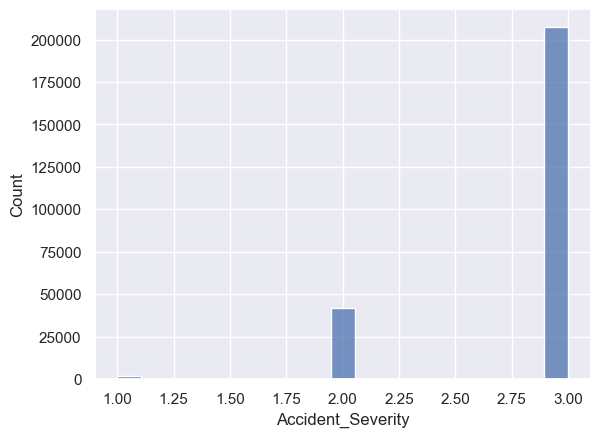

In [75]:
sns.set(style="darkgrid")

sns.histplot(data=collisions, x="Accident_Severity")

<AxesSubplot:xlabel='Accident_Severity', ylabel='Count'>

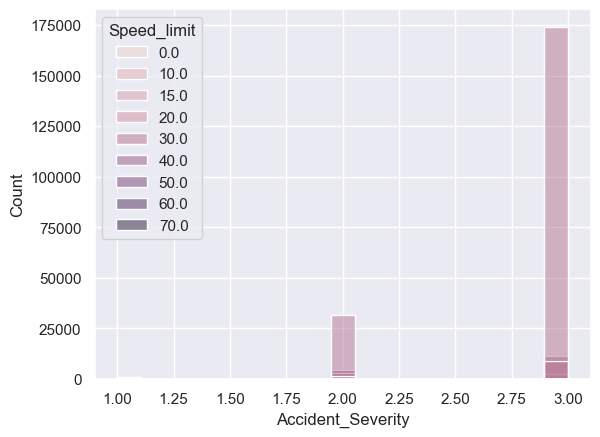

In [76]:
sns.set(style="darkgrid")

sns.histplot(data=collisions, x="Accident_Severity",hue='Speed_limit')

In [82]:
print('The ratio of bikes to cars is:',aadf.Pedal_cycles.values.sum()/aadf.All_motor_vehicles.values.sum())

The ratio of bikes to cars is: 0.00640042863022381


In [ ]:
print('Total bikes counted:',aadf.Pedal_cycles.values.sum()/aadf.All_motor_vehicles.values.sum())

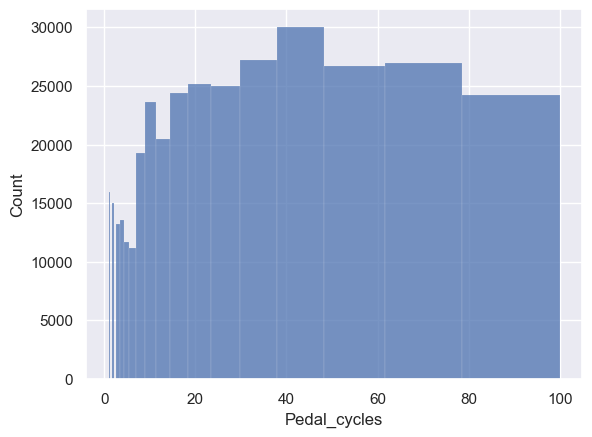

In [100]:
sns.set(style="darkgrid")

g = sns.histplot(data=aadf, x="Pedal_cycles",bins=np.logspace(0,2,20))
#g.set(ylim=(0,100))

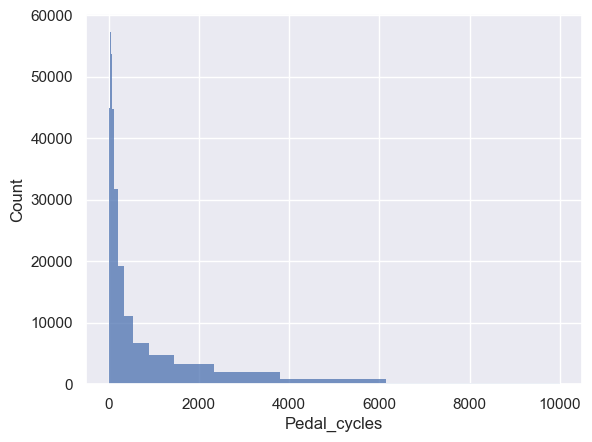

In [103]:
sns.set(style="darkgrid")

g = sns.histplot(data=aadf, x="Pedal_cycles",bins=np.logspace(0,4,20))
#g.set(ylim=(0,100))

In [87]:
10**4

10000

In [103]:
A,B = neigh.kneighbors(collisions[['Longitude','Latitude']],20)

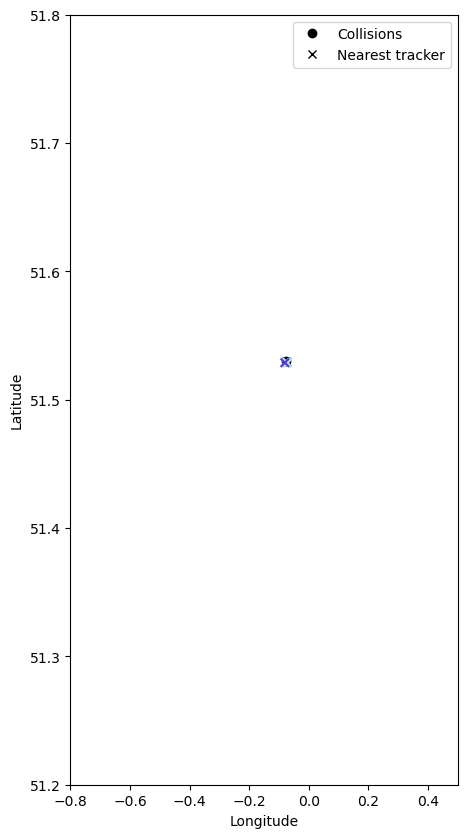

In [124]:
plotN = 1000

colors = np.random.rand(20,3)

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(1,1,1)
ax.scatter(collisions.iloc[plotN].Longitude,collisions.iloc[plotN].Latitude,c='black')
ax.scatter(aadf.iloc[B[plotN].flatten().tolist()].Longitude.values,aadf.iloc[B[plotN].flatten().tolist()].Latitude.values,c=colors,marker='x')

#Get artists and labels for legend and chose which ones to display
handles, labels = ax.get_legend_handles_labels()
display = (0,1,2)

#Create custom artists
simArtist = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
anyArtist = plt.Line2D((0,1),(0,0), color='k',marker='x',linestyle='')

#Create legend from custom artist/label lists
plt.legend([handle for i,handle in enumerate(handles) if i in display]+[simArtist,anyArtist],
          [label for i,label in enumerate(labels) if i in display]+['Collisions', 'Nearest tracker'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([-0.8,0.5])
plt.ylim([51.2,51.8])
plt.show()

In [120]:
A[30]

array([0.00401024, 0.00401024, 0.00401024, 0.00401024, 0.00401024,
       0.00401024, 0.00401024, 0.00409369, 0.00409369, 0.00409369,
       0.00409369, 0.00409369, 0.00409369, 0.00409369, 0.00409369,
       0.00441614, 0.00441614, 0.00441614, 0.00441614, 0.00441726])

In [115]:
aadf.columns

Index(['Count_point_id', 'Year', 'Region_id', 'Region_name', 'Region_ons_code',
       'Local_authority_id', 'Local_authority_name', 'Local_authority_code',
       'Road_name', 'Road_category', 'Road_type', 'Start_junction_road_name',
       'End_junction_road_name', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Link_length_km', 'Link_length_miles', 'Estimation_method',
       'Estimation_method_detailed', 'Pedal_cycles',
       'Two_wheeled_motor_vehicles', 'Cars_and_taxis', 'Buses_and_coaches',
       'LGVs', 'HGVs_2_rigid_axle', 'HGVs_3_rigid_axle',
       'HGVs_4_or_more_rigid_axle', 'HGVs_3_or_4_articulated_axle',
       'HGVs_5_articulated_axle', 'HGVs_6_articulated_axle', 'All_HGVs',
       'All_motor_vehicles', 'Road_name1', 'Road_name2'],
      dtype='object')

In [128]:
aadf.iloc[B[plotN].flatten().tolist()].Year.values

array([2016, 2012, 2007, 2011, 2013, 2017, 2014, 2015, 2006, 2009, 2008,
       2010, 2019, 2021, 2018, 2020, 2009, 2008, 2003, 2009], dtype=int64)

In [111]:
B[plotN]

array([447110, 479700, 501911, 419770, 351818, 212788, 306469,  34662,
       184812, 140664,  14673,  54675, 261581, 283977, 162855, 374521,
       118604,  74742,  96675, 239461], dtype=int64)